# Convolutional Neural Networks

Convolutional Neural Networks are the Deep Learning Architectures proved exceptionally excellent in image analysis, classification, recognition/detection, and feature extraction domains.

Before understanding what they are, how they are work and whats the algorithm going on, We first need to start with how Computers see?

Images are just some RGB(Red-Green-Blue) pixel values. Which can be represented between 0 to 255 where 0 means means black and 255 means white.

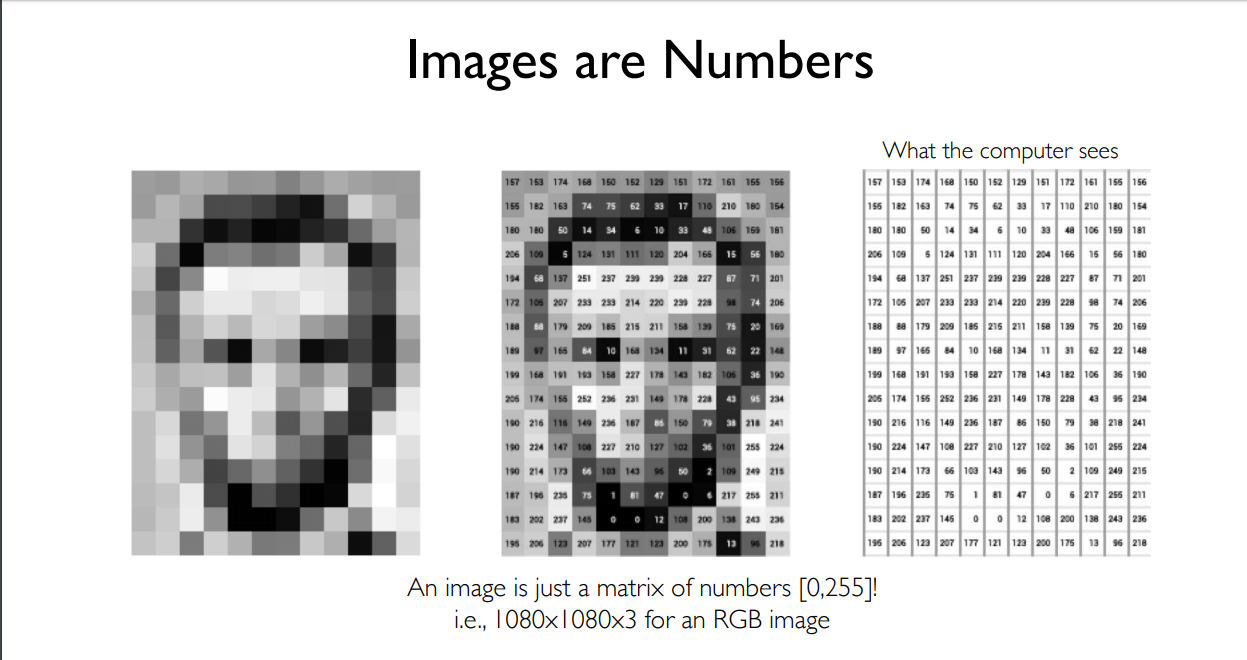

This is the format in which computers in which generally images are read by computers. All the filters you use in your Instagram stories are modifications and operations on the value of thses pixel values.

But can we make computers to do complex tasks like Classification and detection of objects?

If we don't know about Deep Convolutional Networks, what should be our approach?

Simple. We will just code all the features present out there. Like if we want to make a model which detects whether the image is Banana or not. So we will just do some Hard Coding. Like,
1. Its Elongated 
2. Crescent-shaped 
3. Yellow fruit with soft sweet flesh”

But still we don't be able to solve the problem, because what if banana is green? or Black? or half eaten? or of different size. There are different types of problems we will encounter we will detect while solving similiar approach by "Hard Coding the features" approcah.

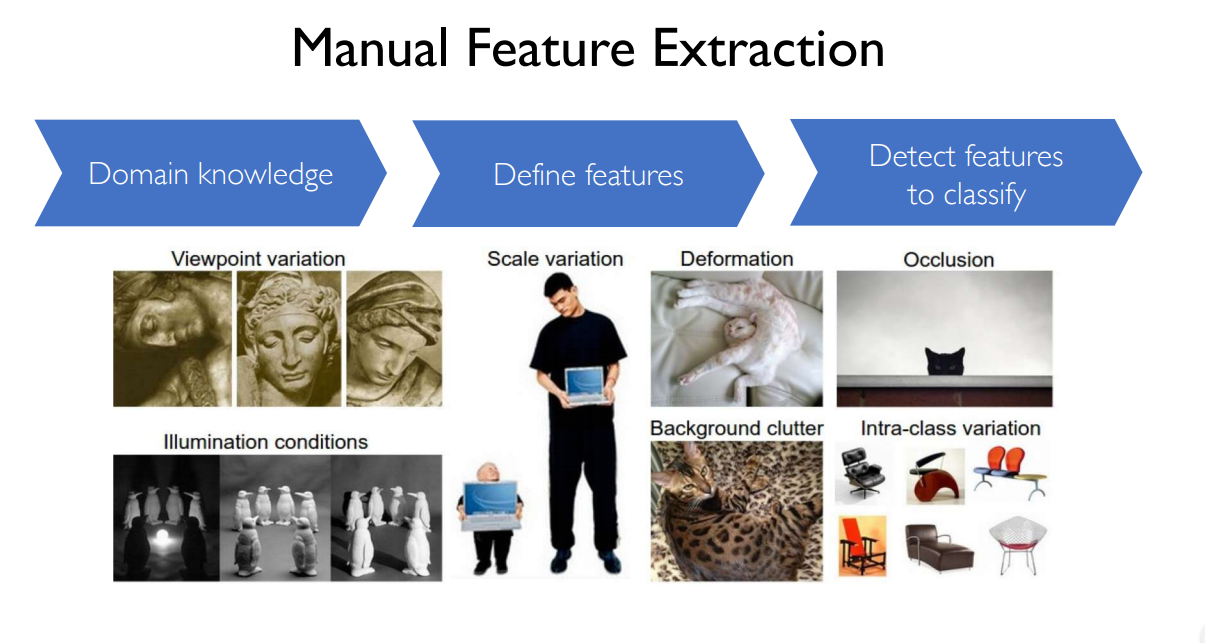

So when we have such bigger and considerable amount of problems, whats should be the solution?

The answer is features. We have to have an algorithm that features in  hierarchy; Low level features first and higher level feature later.

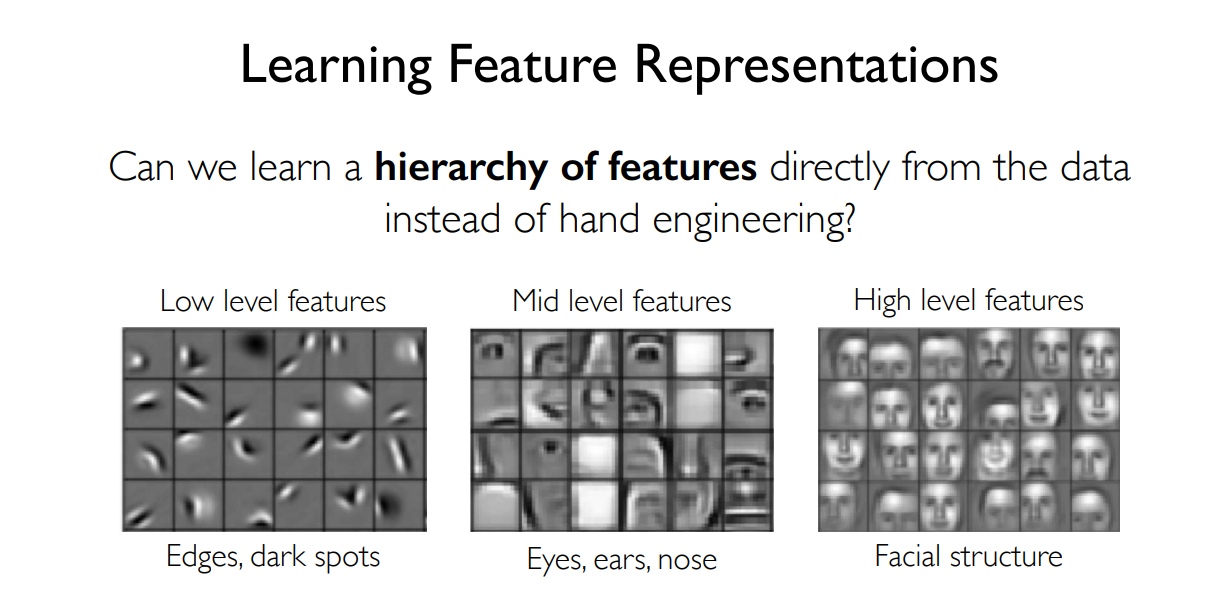

Lets see that if we can solve the same problem with Neural Networks

Have a look at Fully Connected Neural Networks

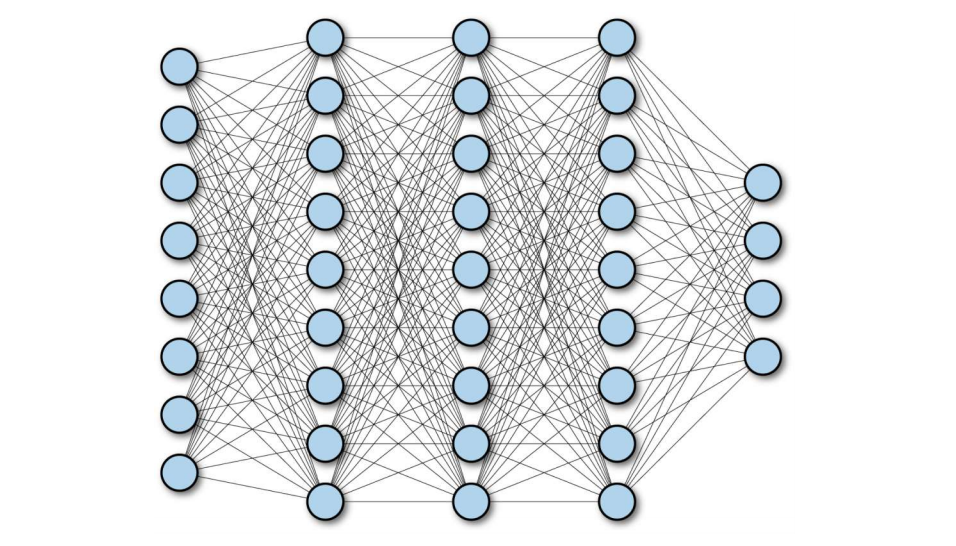

Mark your attention in the input layers,
To feed image data in that layer, we need to flatten the Image matrix.

What I mean is as follows:

1. Images are numbers, They can be considered as a 2-D Tensor. We need to flatten that. For example, I have a matrix A = [[1, 2], [3, 4]], which is no doubt a 2-D Tensor. But if we flatten it, A_Flatten would be [1, 2, 3, 4]


2. Once we have flatten the Image Matrix, we can directly insert to it our fully connected neural network directly and process the image.


3. The model will do a series of matrix operations on that flattened array, with non-linearities at every step(Activation Function). 


4. It will get us an array which size depends on the number output class, if thats a classifciation problem or a single array if thats a regression problem. We will apply softmax function to get an output which is readable and predicatble. Then if thats a classification problem, we can add one-hot encoding to it to get a single output or argmax function on that to get number of outouts(If you don't know one-hot and argmax, have a look in simple neural network)


5. That would be so far away from the original label, we will traverse backward in.layer by backpropagating the error, and applying Gradient Descent to it to minimize the loss(Training is actually minimizing the loss). 


6. This whole process will be done in loop which will get us the correct set of weights and bias(learnable parameters). We can save it then in a file.


7. Now whenever we need some similar task to predict or classify something in an image. We will just flatten the image and apply same set of weight and bias vectors and some non-linearity to get a readable output.

##### BUT

Note that we have worked on pixels, that is one pixel at a time, 

But what we were trying to develop some algorithm to extarct features and features are not a single pixel, 

They can be made up of several pixels, 

probably a ((x-m), (y-n)) segment inside the image with size (x, y)

##### SO

Instead of *taking one pixel at a time, multiplying it with weight and adding a bias to it,*

*We can take an image some segment with pixel location (m, n) and multiply it with a weight matrix of (n, a), and then add a bias of size of (a). This way can extract features. And then multiple with same weights with a new segment of same size, probably at pixel locations ((m + x), (n + y))*

**Thats a bit much to digest but try to visualize and understand it, if you understood this, you got a whole idea of whats going on**

This **weight matrix** is called **filter** or **kernel**(I will use these terms interchangeably, but they mean the same thing.) which is used to extract features from image.

Those **x**, **y** are the pixel values which tells us how many steps a filter will move. to multiply with a new image segment, the (x, y) known as **stride**.

Smaller the size of filter, more finely it will have perform this operation on the image. Better will be our feature extraction.

Smaller the size of stride, more area of image will be covered and hence, feature extraction will be more fine and wide spread.

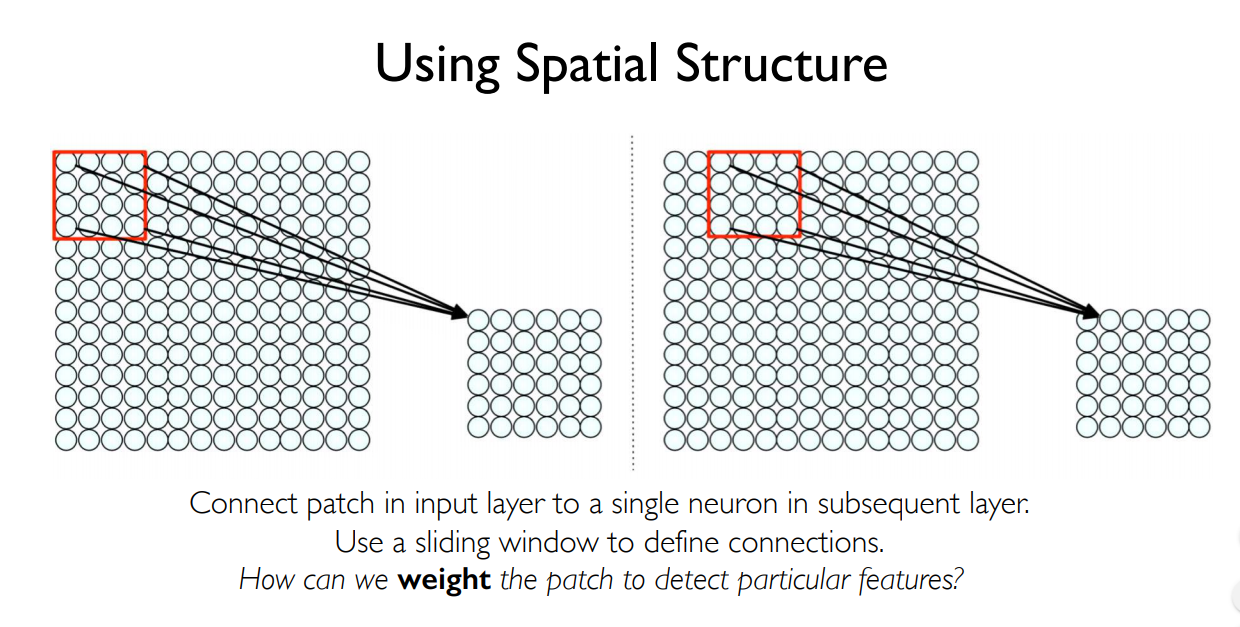

##### AND GUESS WHAT, THIS PATCHY OPERATION WE JUST PERFORMED, IS CALLED CONVOLUTION

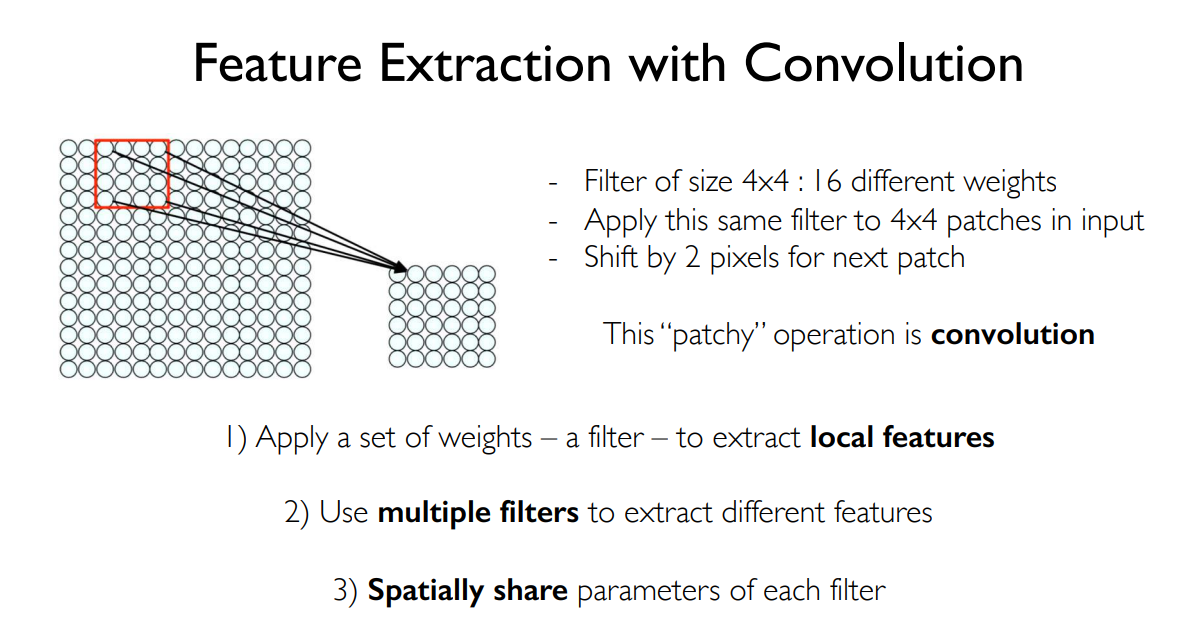



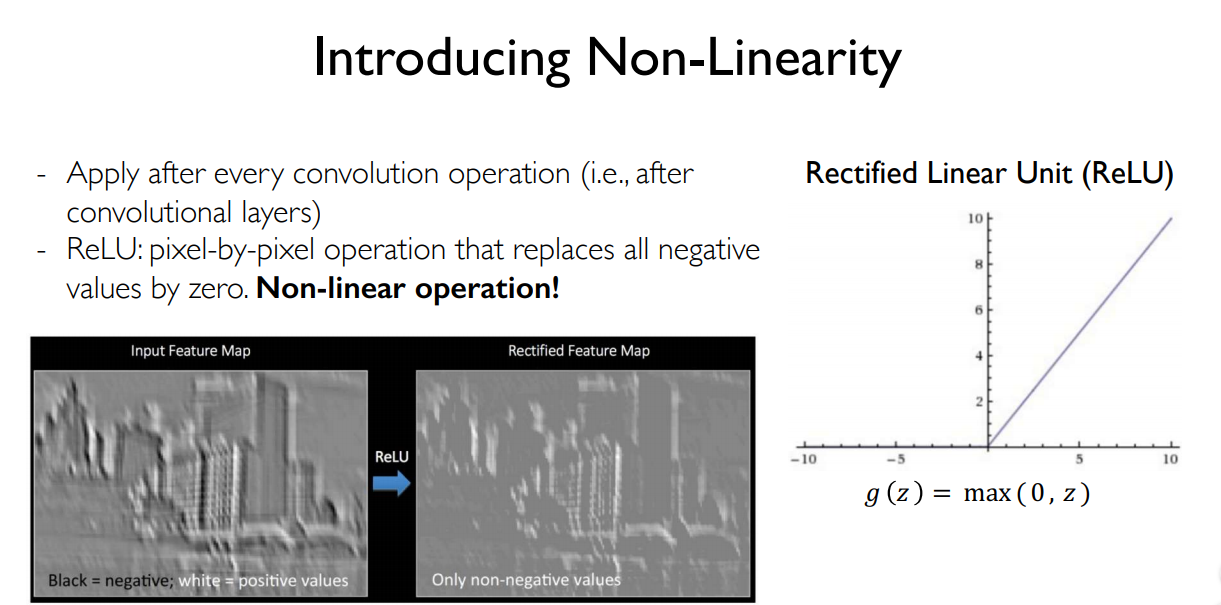

And we apply some non-linearity at the end of one convolution and repeat this process again and again. We get **CONVOLUTIONAL NEURAL NETWORK**

##### BUT HOW THESE FILTERS, EXTRACT THE FETAURES(CORNERS, EDGES, ROUNDS EDGES, FURTHER CLOSED FIGURES, AND ULTIMATELY THE WHOLE OBJECT) ??

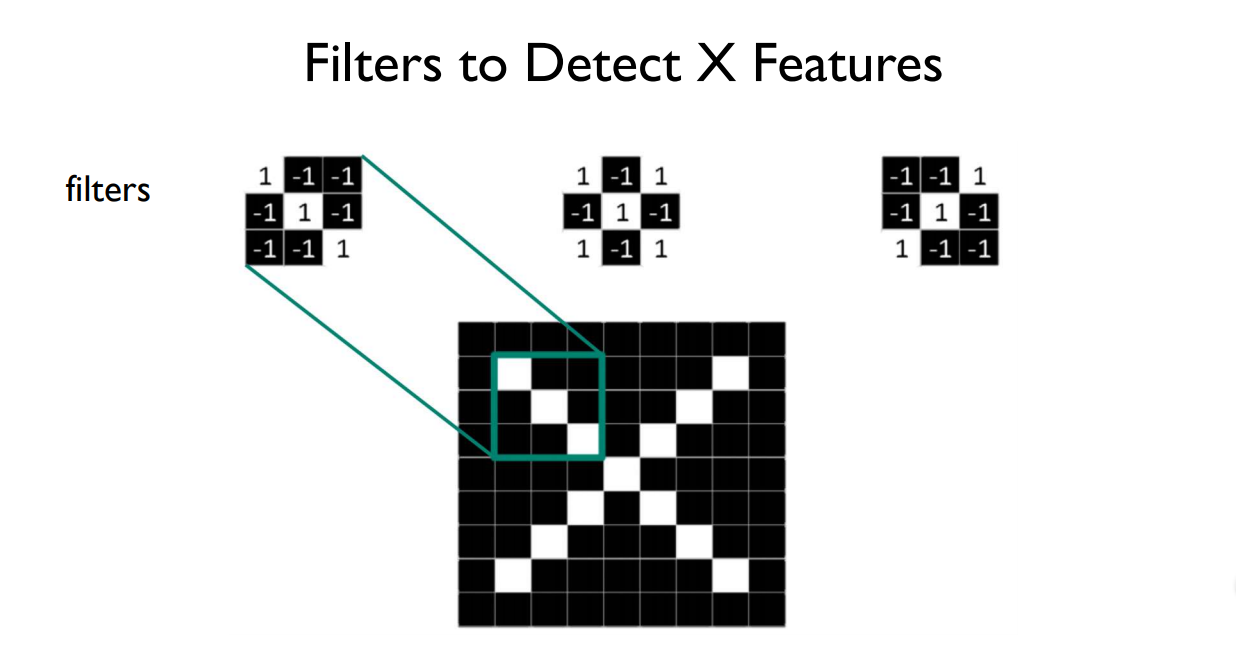

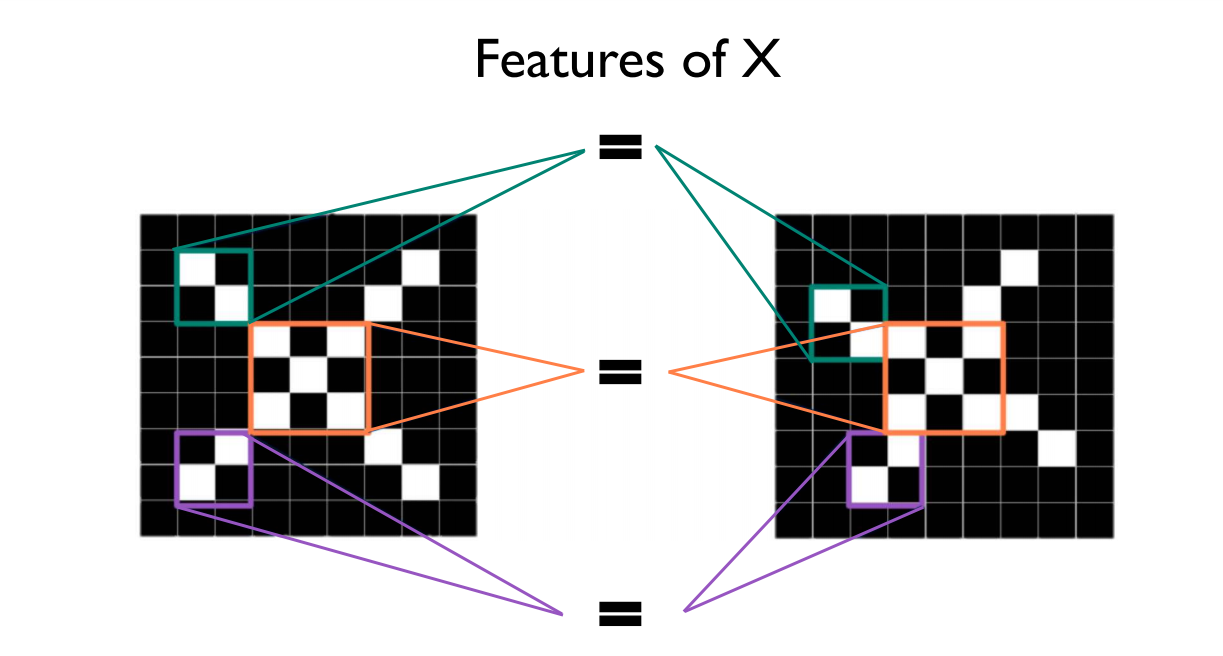

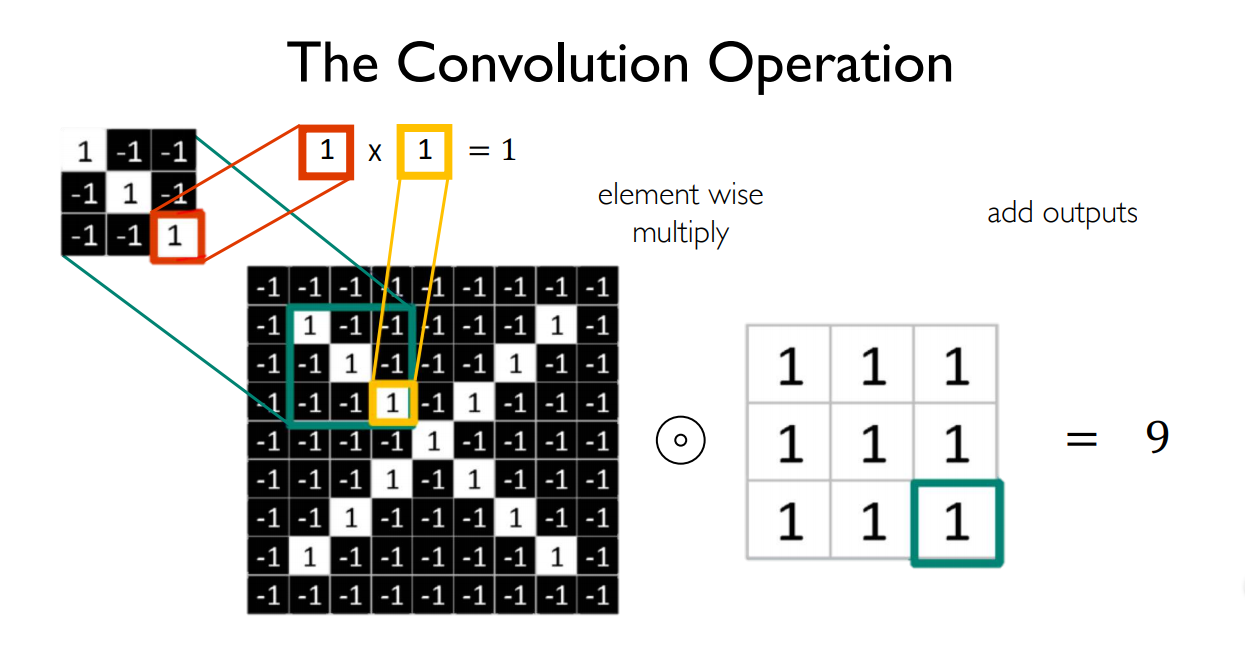

##### And how these filter(Here I am referring the values there, ie. elements inside the kernel) will extract the exact same fetaures in the hierarchy, and get us correct output? 

**They don't**

Those kernel values are the learnable parameters, they get improved as we minimize the loss using Gradient Descent in Back Propagation. 

###### Lets just visulize this convolutional operation step by step

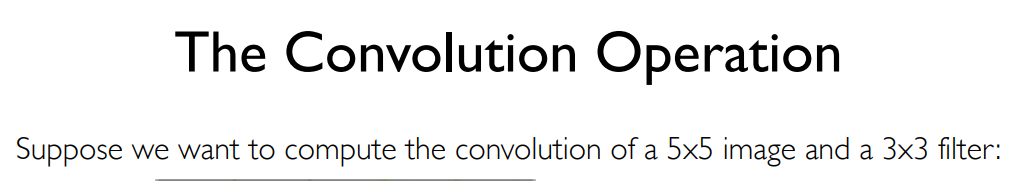

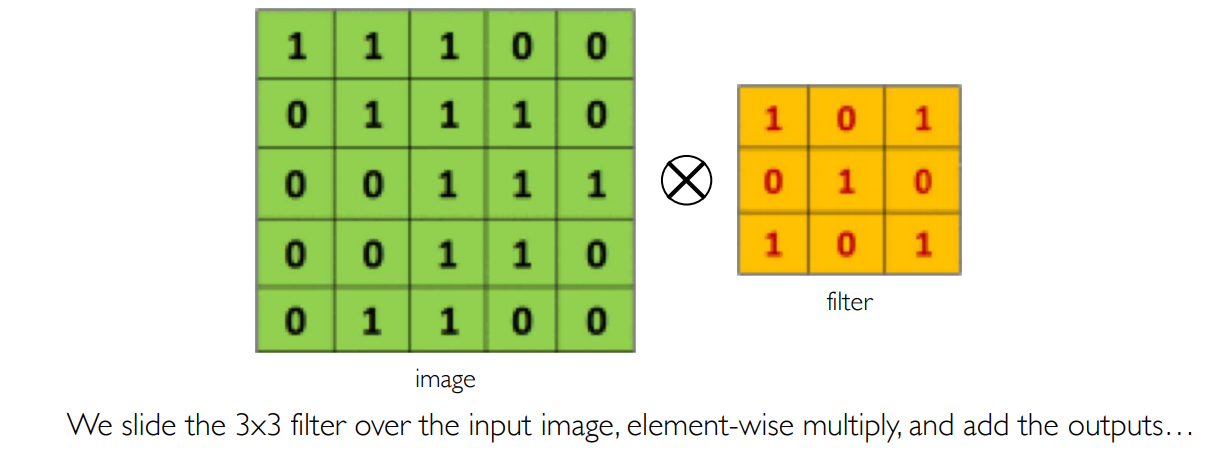

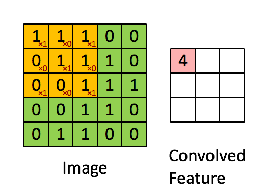

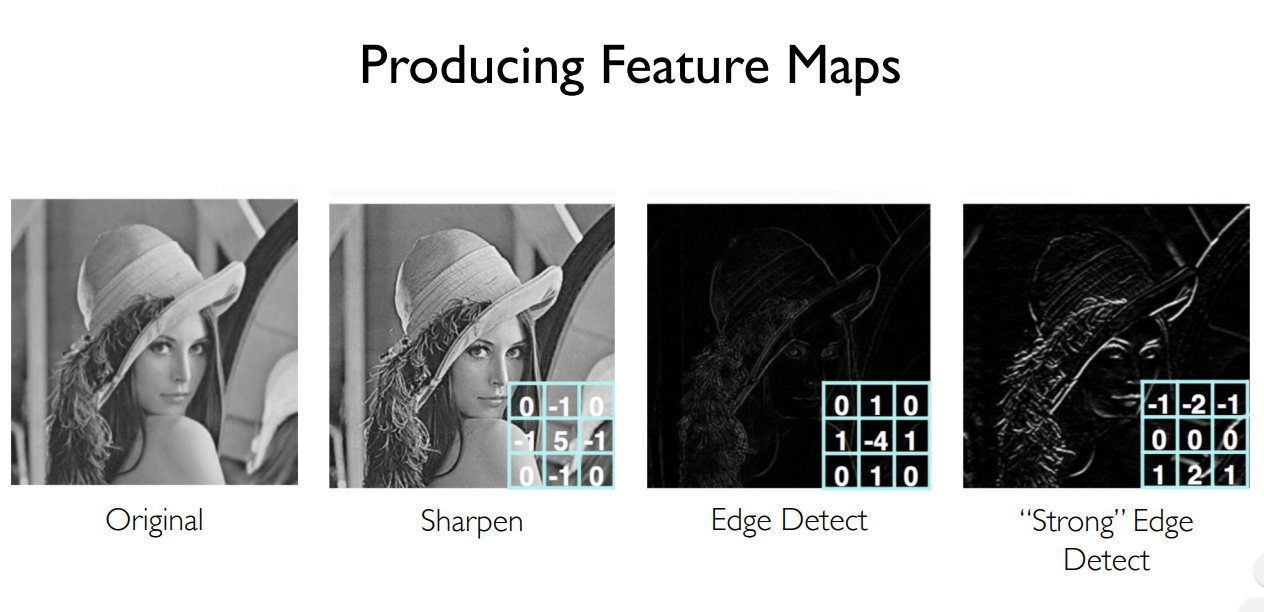

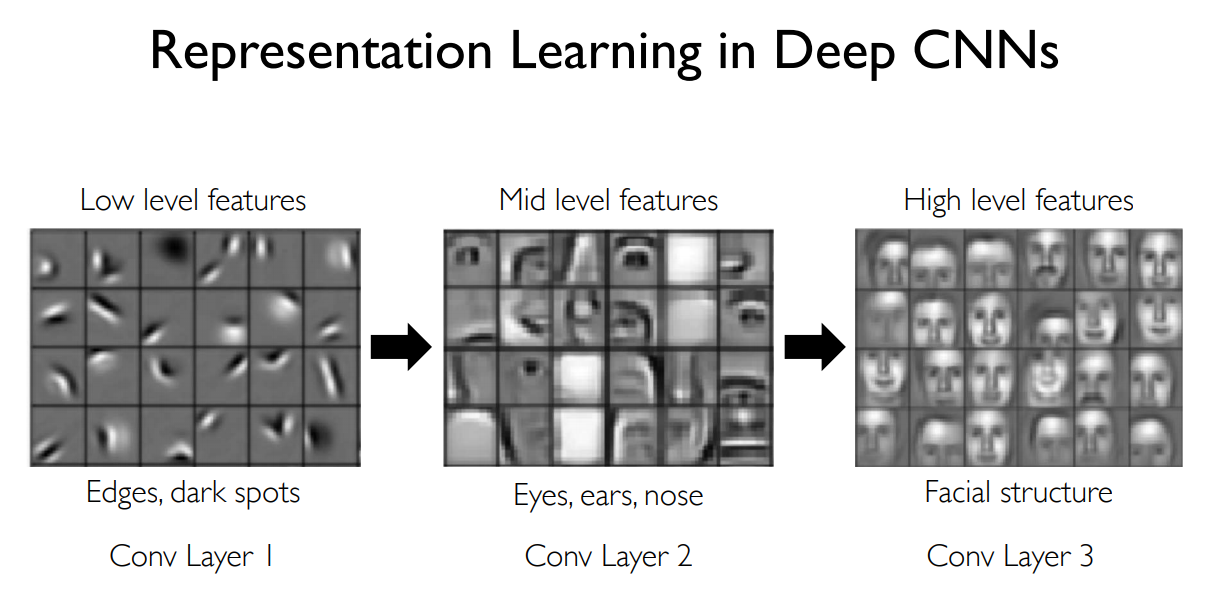

## Dimensionality Reduction in CNN

Dimensionality Reduction is the core concept in Convolutional operations. The new image will always be have less dimensions than the original layer. 

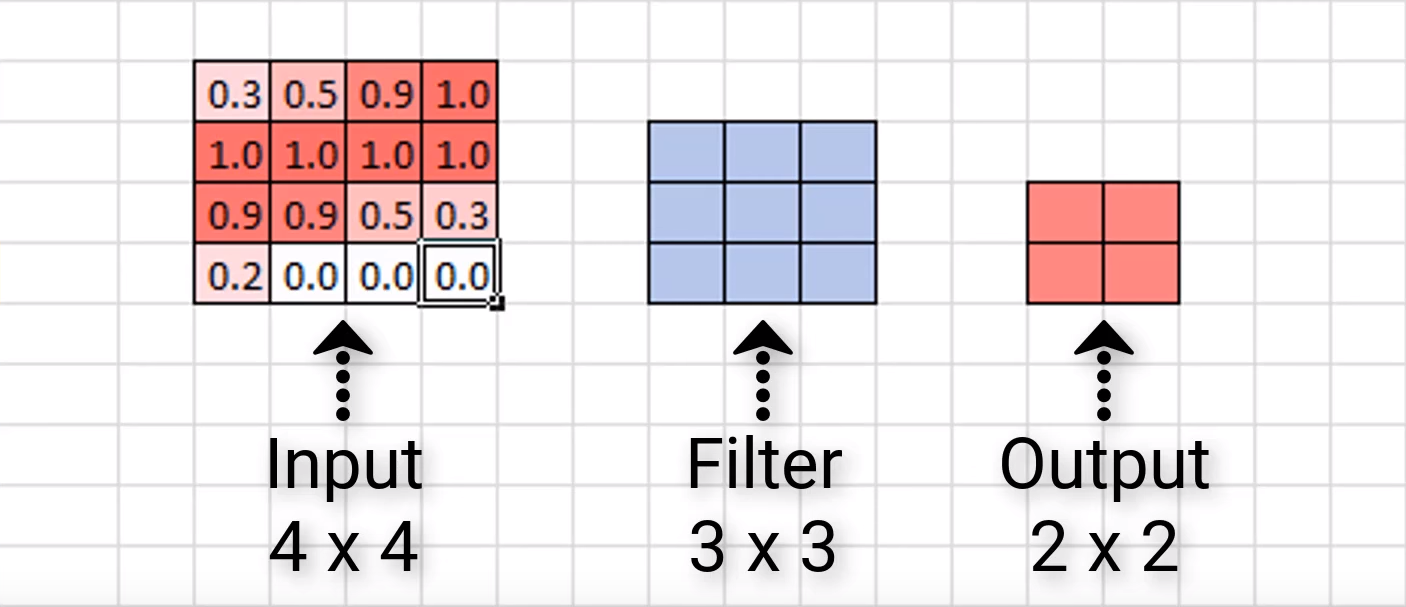

If,
Original image size is (X, Y)
Kernel size is (m, n)

The feature map(convolved image) will be of size ((X - m + 1), (Y - n + 1))

**TODO** - try the above formula in given example

###### BUT

Aren't we loosing important Data out there??? 

We are, so how do we conserve the original size of the image in each convolutional layer.

What if we increase the image size before every convolutional layer??

That would be best. **BUT** How do we increase the size, without even distorting the original content in our image??

SIMPLE, Just add rows and columns and all four sides of the image with pixel values as zero.

This way we can preserve the original size after convolutional operation, without even touching the original image.

This process is called **Zero Padding** 

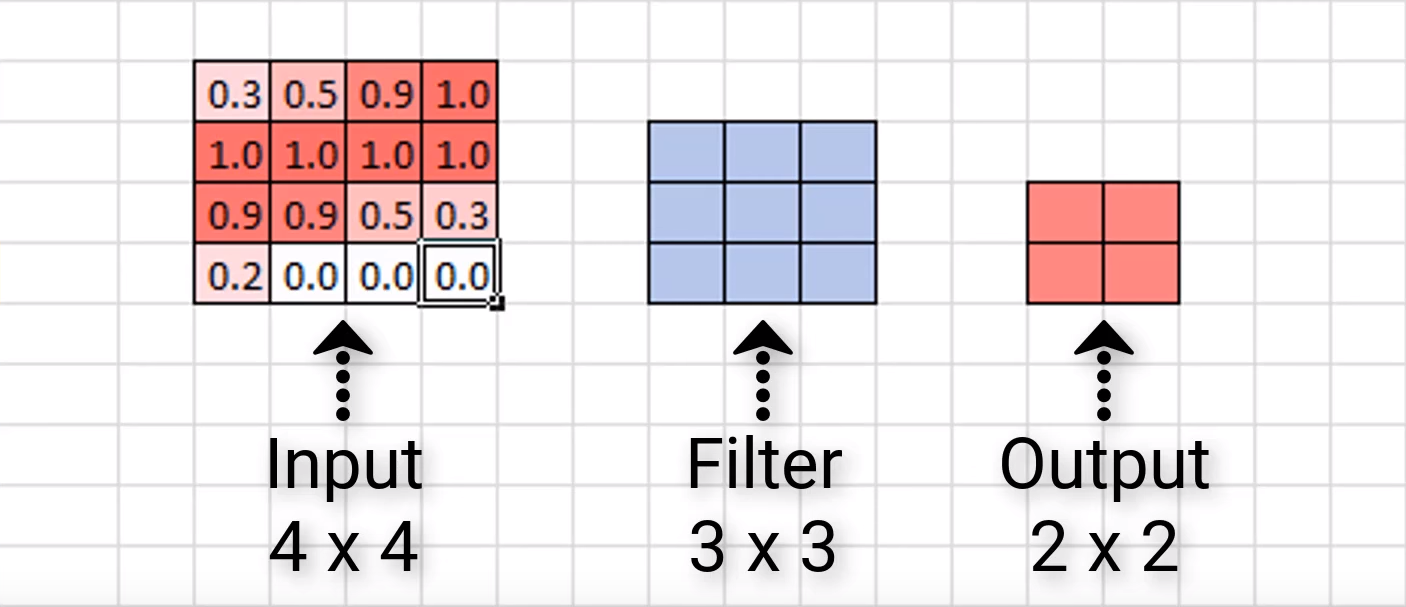

So, till now, we did an awesome job in preserving the data, and not reducing the dimension. But, a convolutional network is much more complex than that.

### Learnable Parameters in CNN

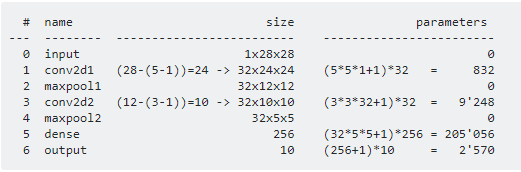

We can get on maxPooling Layers later, but for now we will focus on learnable parameters, you have a total of 832 + 9'248 + 205'056 + 2'570 = 217'706 learnable parameters. 

Plus, an image is consist of 3 colors, RGB, this whole series of matrix operations will be done over all three sub-images of the original image.

Plus, we have a lot of matrix dot products going on, bias adding on, non-linearities and complex matrix multiplication and differentiaion/ partial differentiation going on.

Also, we need thousands of images to effeciently train a neural network.

Higher the image resolution, more computationally expensive our training will be,

Complex the objects, Diverse the data, more computational power we need. 

We apply dropout layers in our neural networks to make it less computationaly expensive, We also make the image greyscale to reuduce the computational complexity by 1/3.

But all these are making us loose our important data, So we will now learn another dimensionality reduction technique, which can seem a naive and noob approach but works exceptionaly well in reducing computational complexity and preserving the original data.

## Manually Reducing Dimensionality/ Pooling 

Image contains lot of garbage data as well. Like if we want to detect a person in the image, rest everything is just grabage. One of doing this is semantic segmentation(which we will look later on) but what we can do is to apply pooling in our convolved image, which will not only reduce dimensions but effecitvely increase the probability of getting only the content and pixel values we need, not the grabage ones.

Pooling can be performed in following two ways:
    
 1. **Max Pooling** - Divide the image in equal parts, and only have the pixel with maximum value.
 2. **Average Pooling** - Divide the image in equal parts, and take the average of all the pixel values out there.

In the both above, max pooling is the more effective, effecient, and practically proven approach.

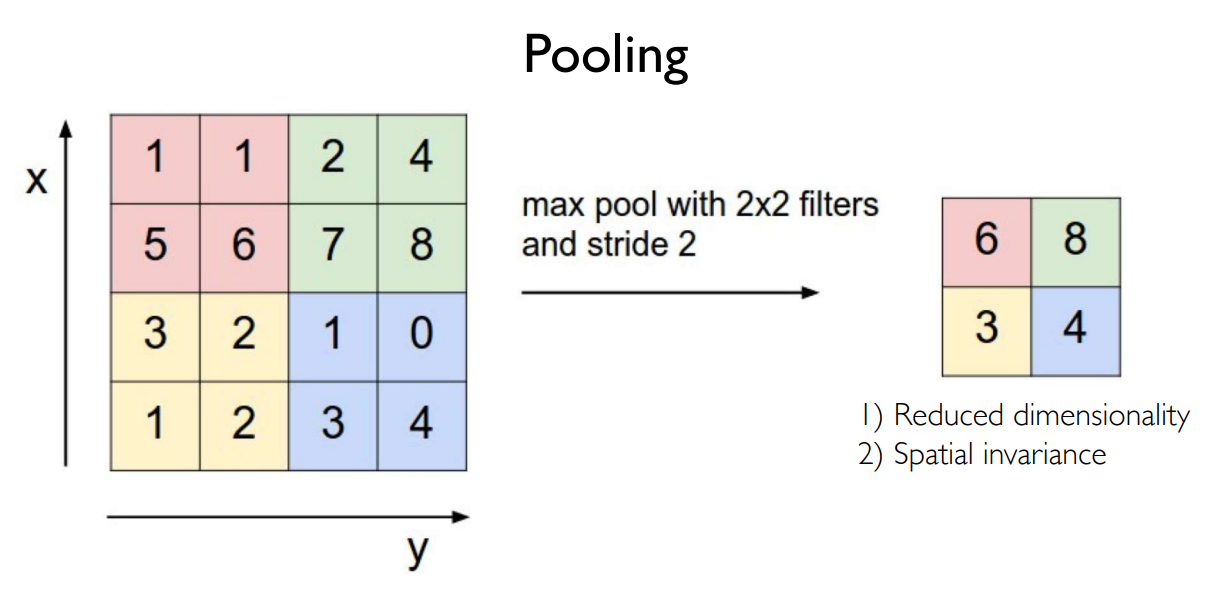

# All the use cases of CNNs

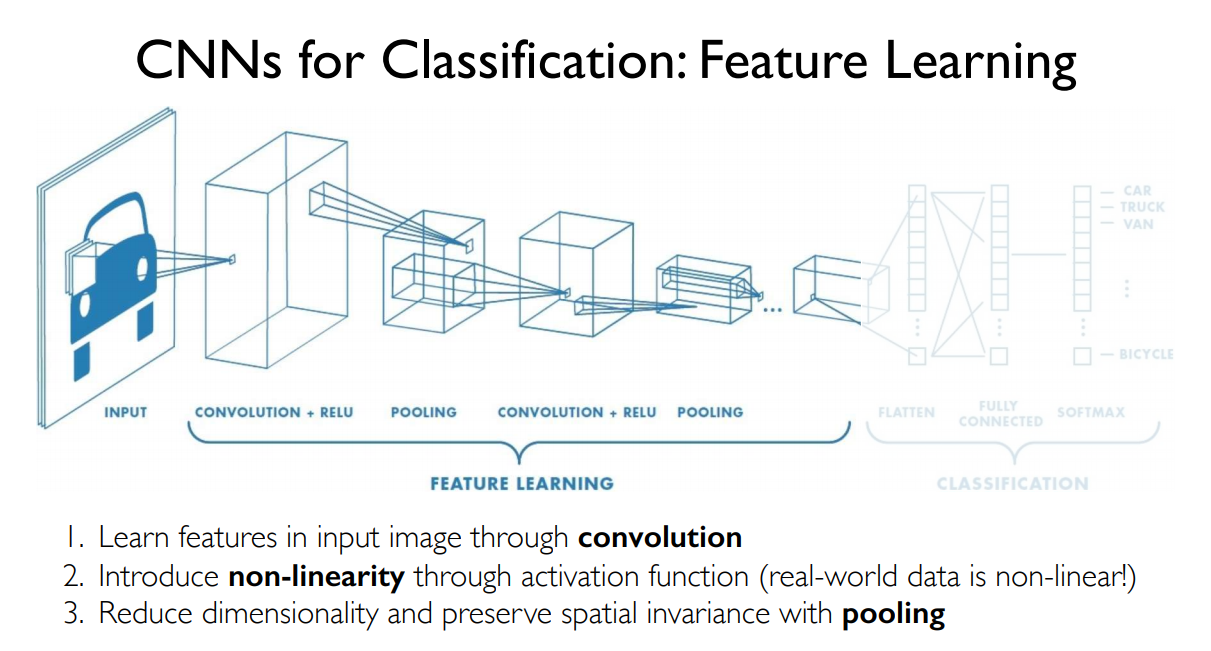

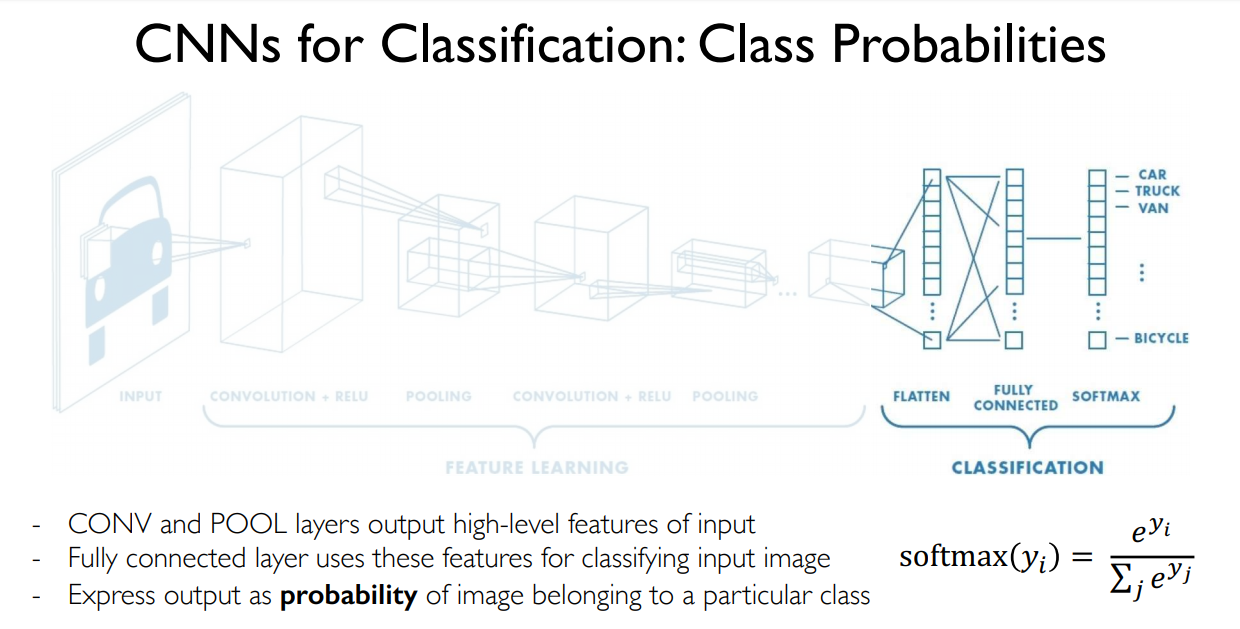

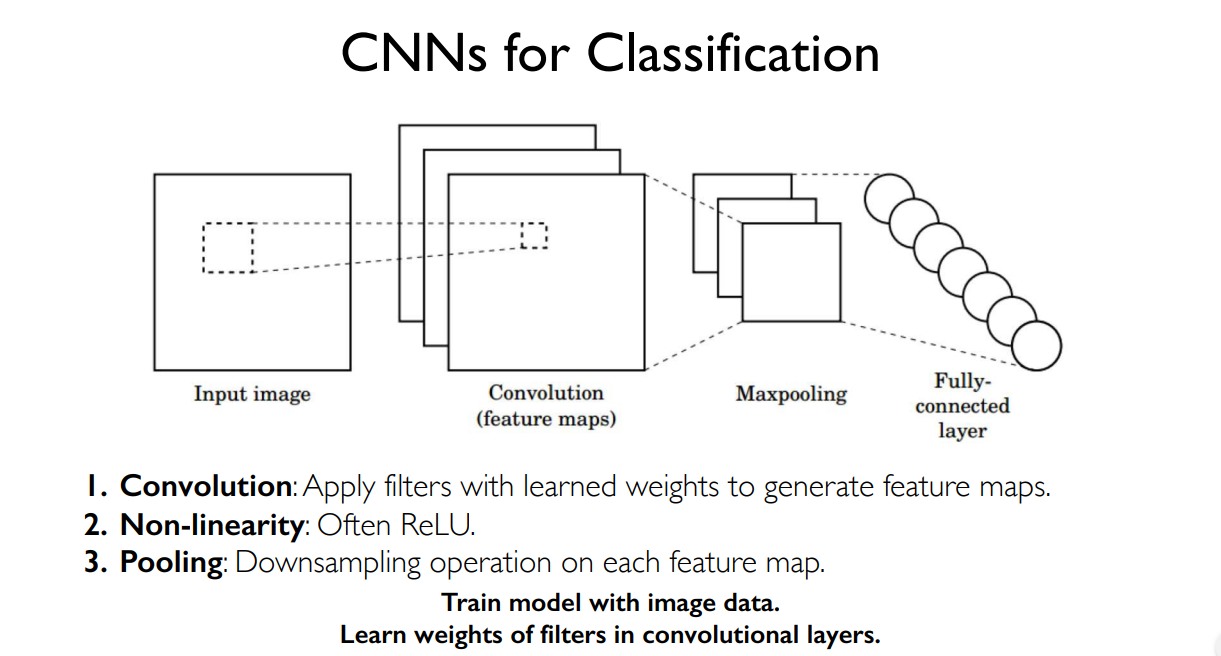

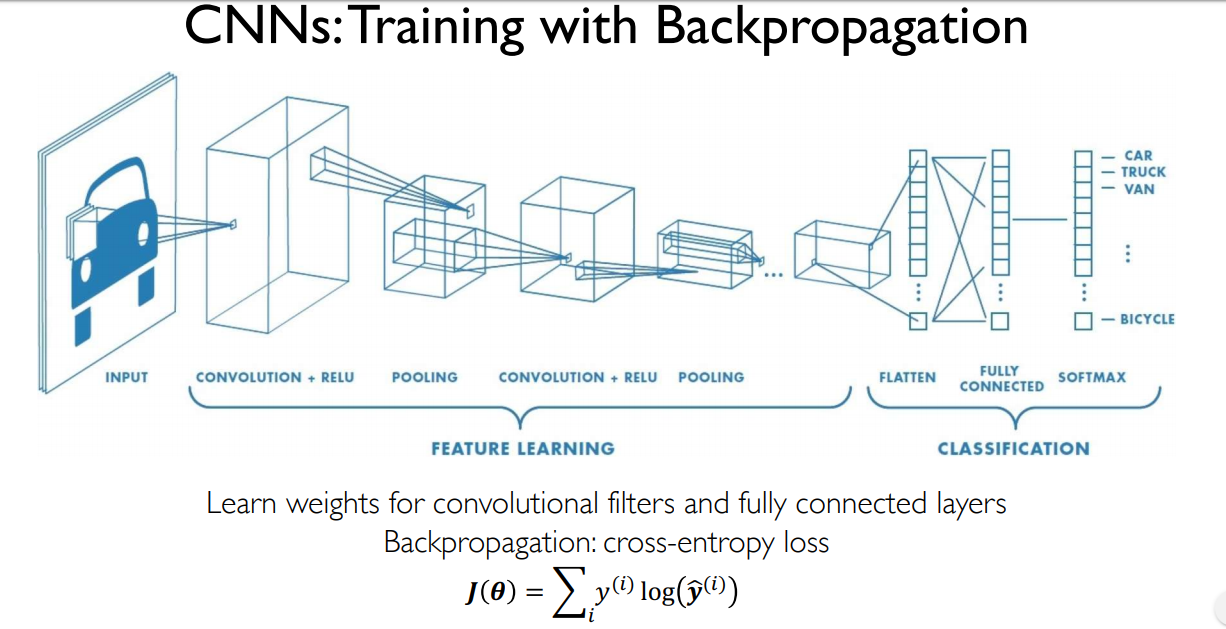

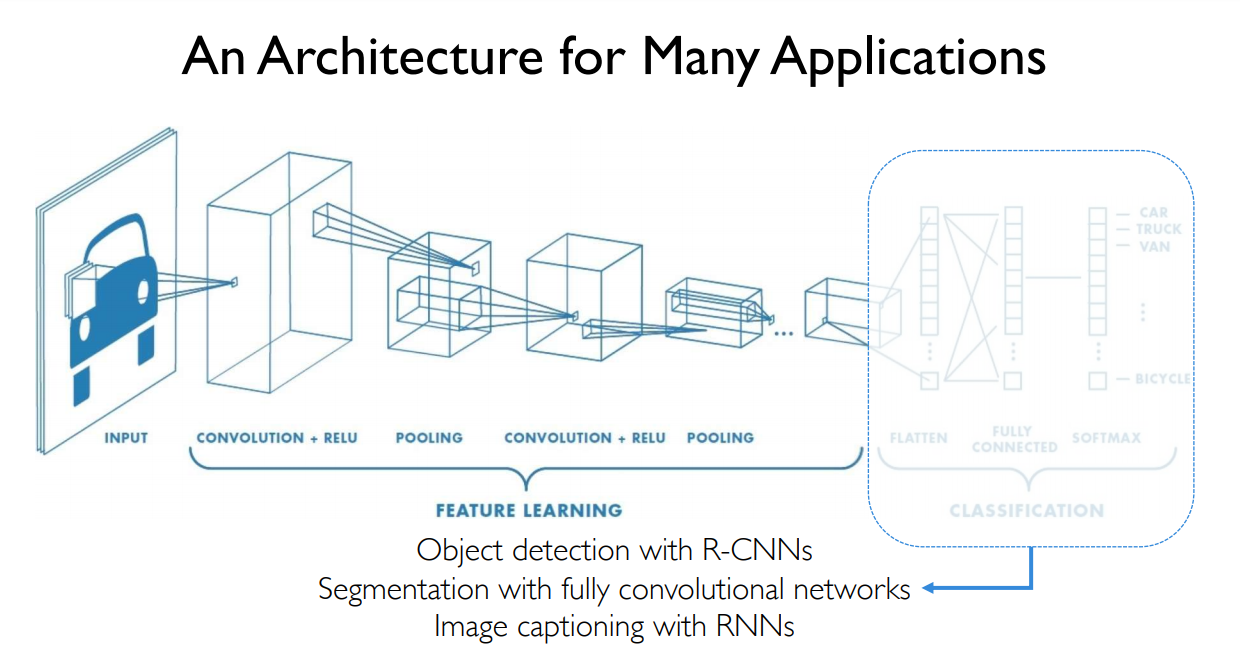